In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [2]:
# initialize data frames
df_day_ahead_energy_price = pd.read_csv('data/day_ahead_energy_price.csv')
df_generation_by_source = pd.read_csv('data/generation_by_source.csv')
df_historical_power_load = pd.read_csv('data/historical_power_load.csv')

## day_ahead_energy_price price cyclicality

In [3]:
# head of day ahead energy price
df_day_ahead_energy_price.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current,version_nbr
0,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.284320,0.227086,0.077234,True,1
1,10/6/2023 5:00:00 AM,10/6/2023 1:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,19.40,19.472430,-0.004559,0.076990,True,1
2,10/6/2023 6:00:00 AM,10/6/2023 2:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,17.80,18.063099,0.207948,0.055151,True,1
3,10/6/2023 7:00:00 AM,10/6/2023 3:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,17.24,17.607010,0.310196,0.056814,True,1
4,10/6/2023 8:00:00 AM,10/6/2023 4:00:00 AM,1,PJM-RTO,NaN,NaN,ZONE,NaN,18.04,18.391899,0.294921,0.056978,True,1


pnode_id: PNode is a specific location on the electrical grid where prices are established for buying or selling energy.

pnode_name: The name or label associated with the PNode

voltage: The voltage level at the PNode. May affect energy prices because different voltage levels (e.g., high or low) can reflect varying costs of energy transmission or distribution.

equipment: The type of equipment at the PNode, which might influence energy pricing due to differences in transmission efficiency or operational costs.

type: Type of pricing node or equipment type, possibly indicating whether it is a generation point, load point, or transmission node.

zone: The geographic or market zone in which the PNode is located. Different zones might have varying prices based on local supply and demand.

system_energy_price_da: System-wide Day-Ahead energy price. Forecast price for electricity delivered the next day, across the entire energy grid system.

total_lmp_da: The Total Locational Marginal Price (LMP) for the day ahead. LMP includes the system energy price plus the cost of congestion and marginal losses specific to the PNode.

congestion_price_da: The portion of the LMP due to congestion costs, which arise when transmission capacity limits are reached, causing energy prices to rise in specific nodes.

marginal_loss_price_da: The portion of the LMP attributable to marginal losses (i.e., the energy lost as heat during transmission). This affects the final price of electricity.

row_is_current: Flag indicating whether the data row is the most recent record for this specific combination of PNode and time.

version_nbr: The version number of the data record, which may indicate updates or revisions to the dataset.

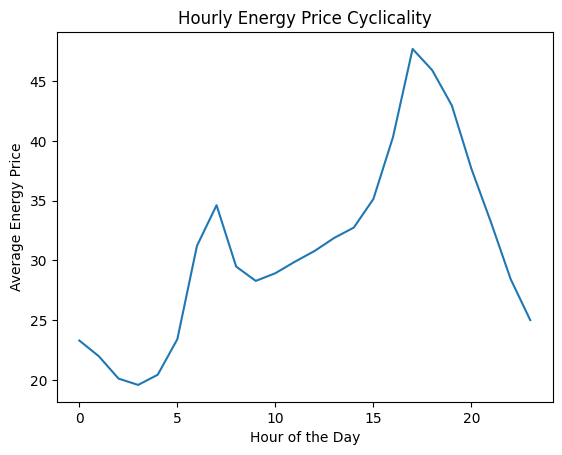

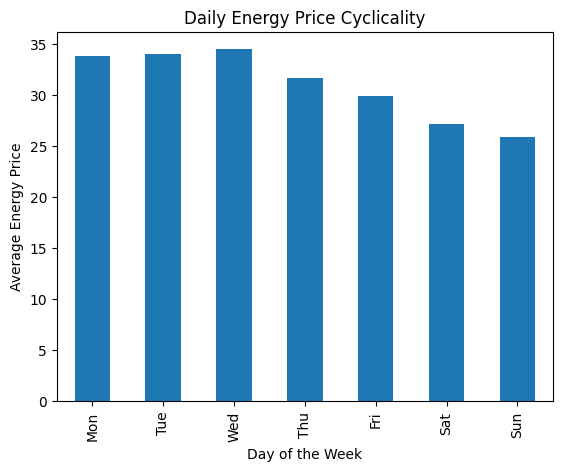

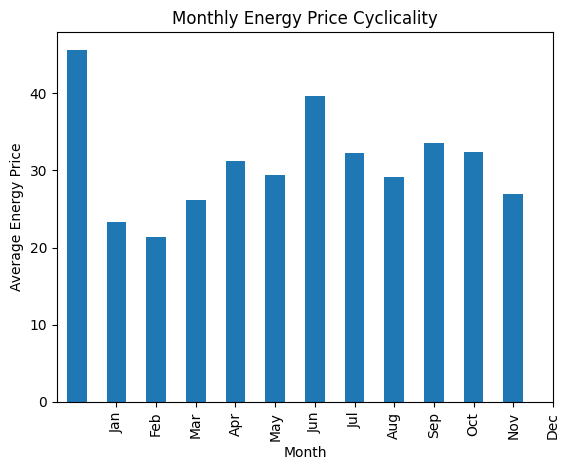

<Figure size 640x480 with 0 Axes>

In [4]:
# Ensure the datetime column is in datetime format
df_day_ahead_energy_price['datetime_beginning_ept'] = pd.to_datetime(df_day_ahead_energy_price['datetime_beginning_ept'])

# Extract hour, day of the week, and month
df_day_ahead_energy_price['hour'] = df_day_ahead_energy_price['datetime_beginning_ept'].dt.hour
df_day_ahead_energy_price['day_of_week'] = df_day_ahead_energy_price['datetime_beginning_ept'].dt.dayofweek  # Monday=0, Sunday=6
df_day_ahead_energy_price['month'] = df_day_ahead_energy_price['datetime_beginning_ept'].dt.month

# Group by hour and calculate the mean system energy price
hourly_group = df_day_ahead_energy_price.groupby('hour')['system_energy_price_da'].mean()

# Plot the hourly cyclicality
hourly_group.plot(kind='line', title='Hourly Energy Price Cyclicality', ylabel='Average Energy Price', xlabel='Hour of the Day')
plt.show()
plt.savefig('plots/hourly_energy_price_cyclicality.png')

# Group by day of the week and calculate the mean system energy price
daily_group = df_day_ahead_energy_price.groupby('day_of_week')['system_energy_price_da'].mean()

# Plot the daily cyclicality
daily_group.plot(kind='bar', title='Daily Energy Price Cyclicality', ylabel='Average Energy Price', xlabel='Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
plt.savefig('plots/daily_energy_price_cyclicality.png')

# Group by month and calculate the mean system energy price
monthly_group = df_day_ahead_energy_price.groupby('month')['system_energy_price_da'].mean()

# Plot the monthly cyclicality
monthly_group.plot(kind='bar', title='Monthly Energy Price Cyclicality', ylabel='Average Energy Price', xlabel='Month')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
plt.savefig('plots/monthly_energy_price_cyclicality.png')


## generation_by_source net load cyclicality

In [5]:
# head of generation by source
df_generation_by_source.head()

,datetime_beginning_utc,datetime_beginning_ept,fuel_type,mw,fuel_percentage_of_total,is_renewable
0,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Coal,9059,0.119,False
1,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Gas,25884,0.341,False
2,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Hydro,775,0.010,True
3,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Multiple Fuels,1826,0.024,False
4,10/6/2024 4:00:00 AM,10/6/2024 12:00:00 AM,Nuclear,30465,0.402,False


fuel_type: Type of fuel used for energy generation. ('Coal', 'Gas', 'Hydro', 'Multiple Fuels', 'Nuclear', 'Oil', 'Other Renewables', 'Solar', 'Storage', 'Wind’) 

mw: Amount of power generated fuel type, measured in megawatts (MW). 

fuel_percentage_of_total: Percentage of total energy generation attributed to this specific fuel type. Contribution of each fuel source to the overall energy mix.

is_renewable: A boolean flag (True/False) indicating whether the fuel type is considered renewable

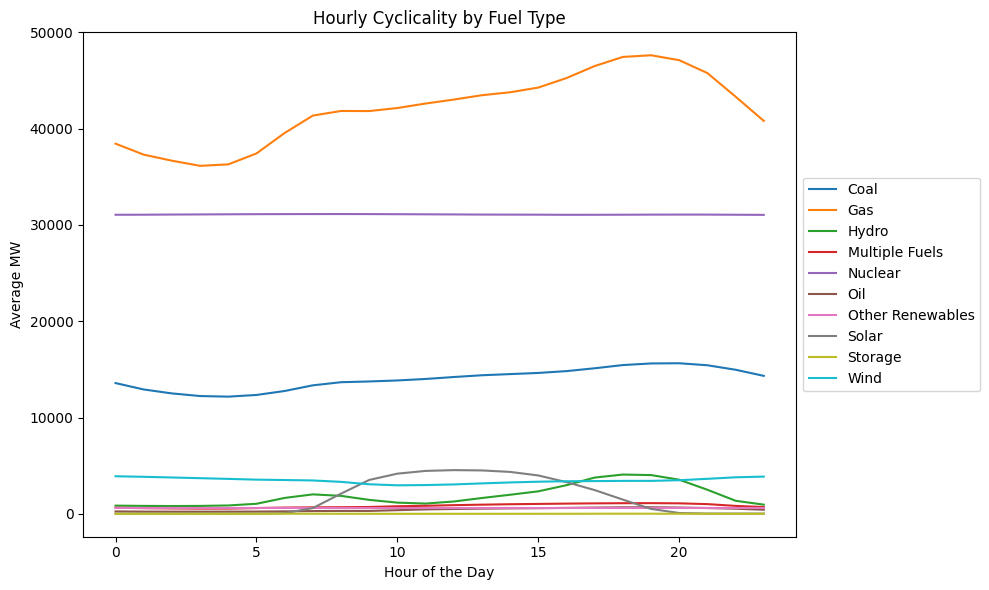

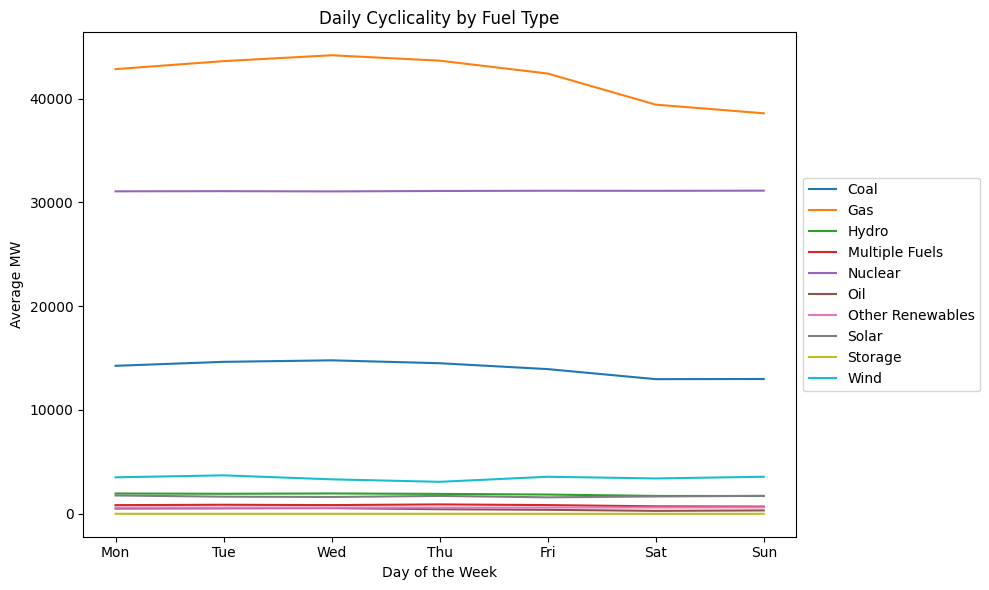

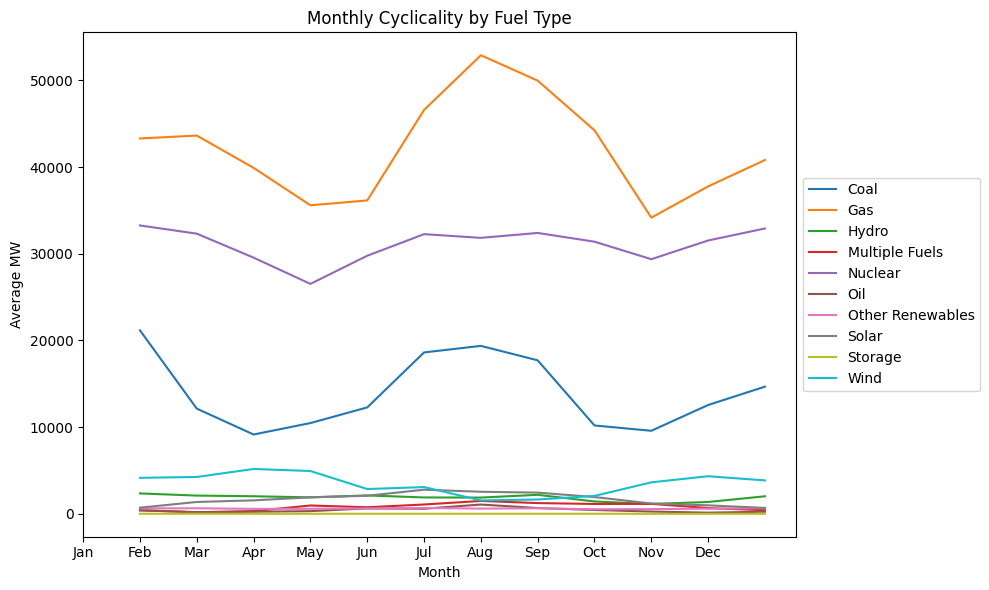

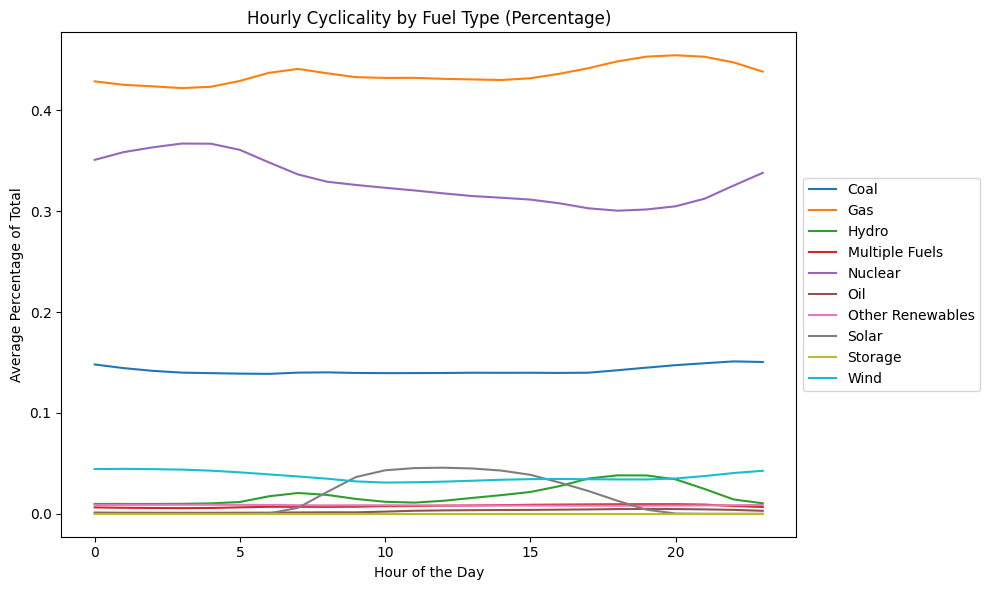

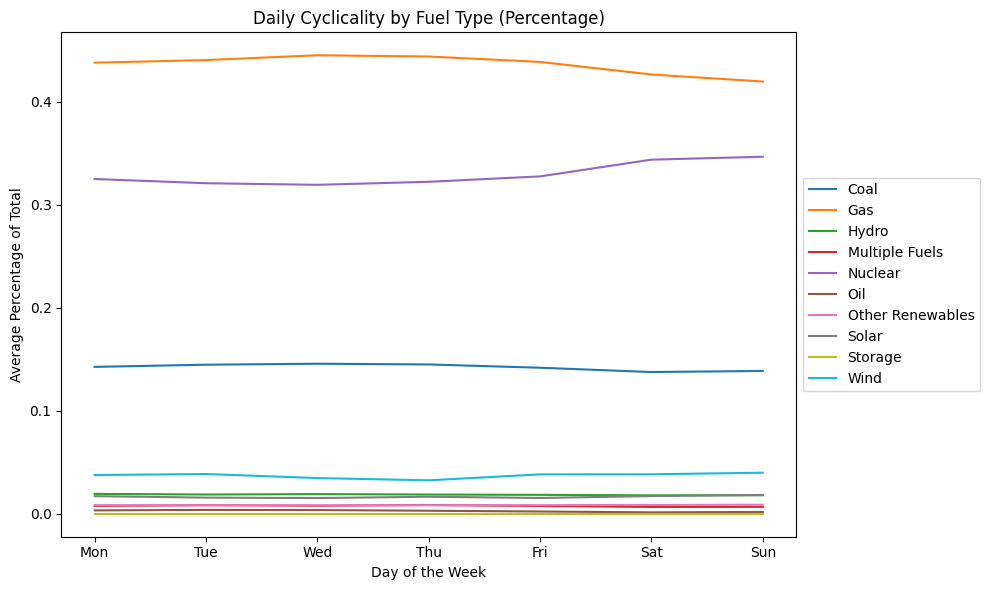

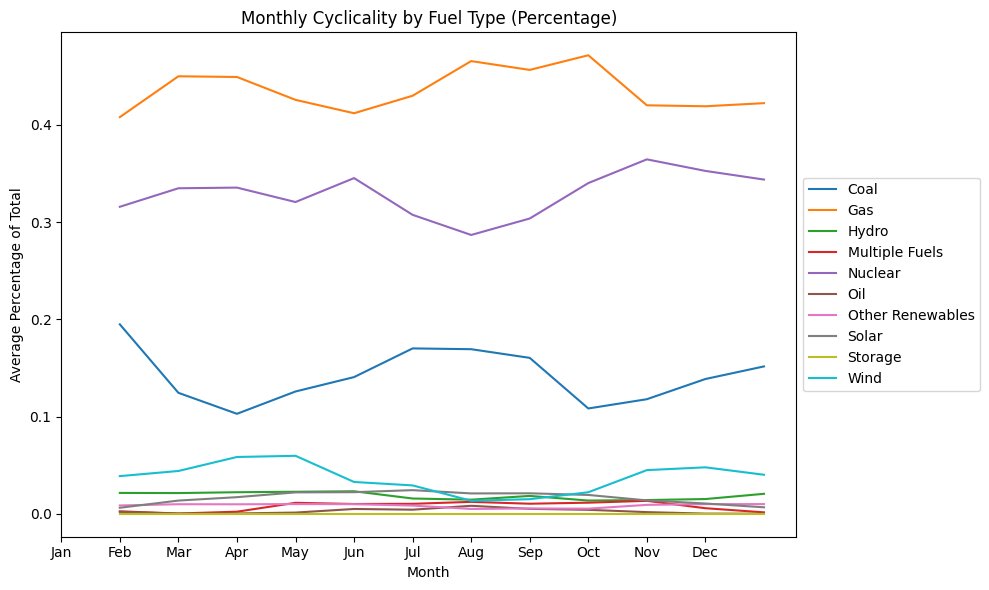

In [6]:
# Ensure the datetime column is in datetime format
df_generation_by_source['datetime_beginning_ept'] = pd.to_datetime(df_generation_by_source['datetime_beginning_ept'])

# Extract hour, day of the week, and month
df_generation_by_source['hour'] = df_generation_by_source['datetime_beginning_ept'].dt.hour
df_generation_by_source['day_of_week'] = df_generation_by_source['datetime_beginning_ept'].dt.dayofweek  # Monday=0, Sunday=6
df_generation_by_source['month'] = df_generation_by_source['datetime_beginning_ept'].dt.month

def plot_cyclicality(df, time_feature, value_column, title, ylabel, xlabel, xtick_labels=None):
    group = df.groupby(['fuel_type', time_feature])[value_column].mean().unstack()
    group.T.plot(kind='line', figsize=(10, 6), title=title, ylabel=ylabel, xlabel=xlabel)
    
    if xtick_labels:
        plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()
    
# hourly cyclicality for each fuel type
plot_cyclicality(df_generation_by_source, 'hour', 'mw', 
                 title='Hourly Cyclicality by Fuel Type', 
                 ylabel='Average MW', xlabel='Hour of the Day')

# daily cyclicality for each fuel type
plot_cyclicality(df_generation_by_source, 'day_of_week', 'mw', 
                 title='Daily Cyclicality by Fuel Type', 
                 ylabel='Average MW', xlabel='Day of the Week', 
                 xtick_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# monthly cyclicality for each fuel type
plot_cyclicality(df_generation_by_source, 'month', 'mw', 
                 title='Monthly Cyclicality by Fuel Type', 
                 ylabel='Average MW', xlabel='Month', 
                 xtick_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# hourly cyclicality for each fuel type by percentage
plot_cyclicality(df_generation_by_source, 'hour', 'fuel_percentage_of_total', 
                 title='Hourly Cyclicality by Fuel Type (Percentage)', 
                 ylabel='Average Percentage of Total', xlabel='Hour of the Day')

# daily cyclicality for each fuel type by percentage
plot_cyclicality(df_generation_by_source, 'day_of_week', 'fuel_percentage_of_total', 
                 title='Daily Cyclicality by Fuel Type (Percentage)', 
                 ylabel='Average Percentage of Total', xlabel='Day of the Week', 
                 xtick_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# monthly cyclicality for each fuel type by percentage
plot_cyclicality(df_generation_by_source, 'month', 'fuel_percentage_of_total', 
                 title='Monthly Cyclicality by Fuel Type (Percentage)', 
                 ylabel='Average Percentage of Total', xlabel='Month', 
                 xtick_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

## historical_power_load cyclicality

In [7]:
# head of historical power load
df_historical_power_load.head()

,evaluated_at_utc,evaluated_at_ept,forecast_hour_beginning_utc,forecast_hour_beginning_ept,forecast_area,forecast_load_mw
0,10/5/2023 9:45:00 AM,10/5/2023 5:45:00 AM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12161
1,10/5/2023 1:45:00 PM,10/5/2023 9:45:00 AM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212
2,10/5/2023 3:45:00 PM,10/5/2023 11:45:00 AM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212
3,10/5/2023 9:45:00 PM,10/5/2023 5:45:00 PM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212
4,10/6/2023 3:45:00 AM,10/5/2023 11:45:00 PM,10/6/2023 4:00:00 AM,10/6/2023 12:00:00 AM,AEP,12212


evaluated_at_utc: The time in Coordinated Universal Time (UTC) when the forecast data was evaluated or generated. 

evaluated_at_ept: The same evaluation time as above, but in Eastern Prevailing Time (EPT), adjusted for daylight savings. 

forecast_hour_beginning_utc: The start of the forecasted hour in UTC. 

forecast_hour_beginning_ept: The same forecast hour start as above, but in EPT. 

forecast_area: The geographic or operational area for which the energy load is being forecasted. Different areas may have different demand profiles, influencing day-ahead prices.
- AEP: American Electric Power – A large utility company serving parts of the Midwest and Southern U.S. within the PJM territory.
- APS: Allegheny Power System (now part of FirstEnergy) –  Pennsylvania, Maryland, and West Virginia.
- COMED: Commonwealth Edison – Northern Illinois, including the Chicago metropolitan area.
- DEOK: Duke Energy Ohio/Kentucky – Southern Ohio and northern Kentucky.
- DOM: Dominion Energy – Parts of Virginia and northeastern North Carolina.
- DAY: Dayton Power & Light (now AES Ohio) – Serves the Dayton, Ohio area.
- DUQ: Duquesne Light – Pittsburgh, Pennsylvania area.
- EKPC: East Kentucky Power Cooperative – Rural areas in Kentucky.
- ATSI: American Transmission Systems, Inc. (Subsidiary of FirstEnergy) – Parts of Ohio and Pennsylvania.
- MIDATL: Mid-Atlantic Region (PJM) – Mid-Atlantic states like Maryland, New Jersey, and parts of Pennsylvania.
- RTO: Regional Transmission Organization (Broader PJM grid)– All the regions under JPM operation.

forecast_load_mw: The forecasted electrical load (demand) for the specified area and time, measured in megawatts (MW).

  forecast_hour_beginning_utc  forecast_load_mw    mw  net_load_mw
0         2023-10-06 04:00:00             12161  5138         7023
1         2023-10-06 04:00:00             12212  5138         7074
2         2023-10-06 04:00:00             12212  5138         7074
3         2023-10-06 04:00:00             12212  5138         7074
4         2023-10-06 04:00:00             12212  5138         7074


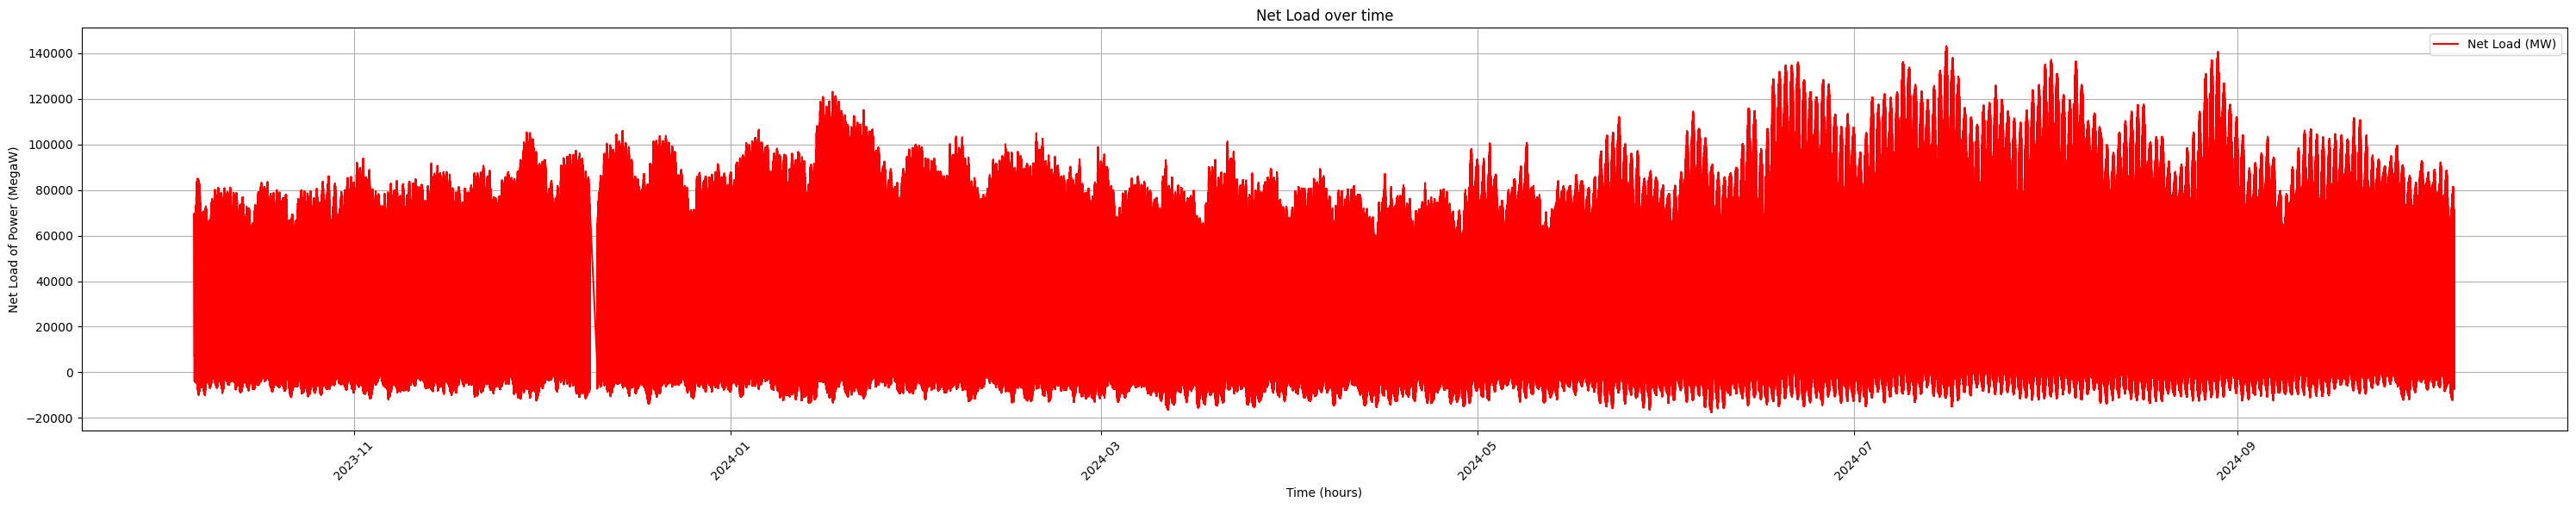

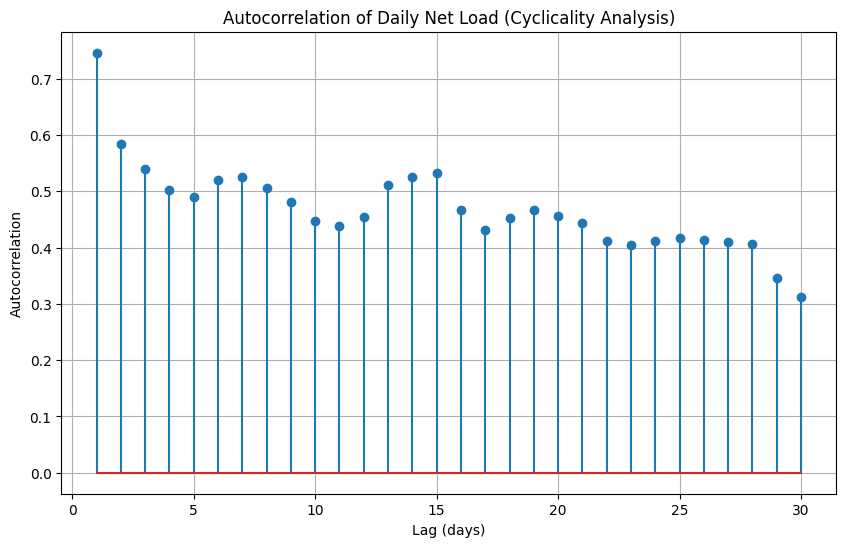

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

generation_data = pd.read_csv('data/generation_by_source.csv')
load_data = pd.read_csv('data/historical_power_load.csv')

# We display rows of each dataset to understand their structure

# Now convert the datetime columns to objects for them to align and merge
generation_data.head(), load_data.head()
generation_data['datetime_beginning_utc'] = pd.to_datetime(generation_data['datetime_beginning_utc']) 
load_data['forecast_hour_beginning_utc'] = pd.to_datetime(load_data['forecast_hour_beginning_utc'])

# Filter the generation data to only include renewable sources (is_renewable == True)
renewable_generation = generation_data[generation_data['is_renewable']]
renewable_generation_agg = renewable_generation.groupby('datetime_beginning_utc')['mw'].sum().reset_index() # by hour
clean_data = pd.merge(load_data, renewable_generation_agg, left_on='forecast_hour_beginning_utc', right_on='datetime_beginning_utc', how='left') # Merge the renewable generation data with the load data
clean_data['mw'].fillna(0, inplace=True)

clean_data['net_load_mw'] = clean_data['forecast_load_mw'] - clean_data['mw'] # Calculate the net load as total load minus renewable generation

net_load_data = clean_data[['forecast_hour_beginning_utc', 'forecast_load_mw', 'mw', 'net_load_mw']]
output_path = 'output_data/net_load_data.csv'
net_load_data.to_csv(output_path, index=False)
print(net_load_data.head())

# Plot net load
plt.figure(figsize=(30, 6))
plt.plot(net_load_data['forecast_hour_beginning_utc'], net_load_data['net_load_mw'], label='Net Load (MW)', color='red')

#details
plt.title('Net Load over time')
plt.xlabel('Time (hours)')
plt.ylabel('Net Load of Power (MegaW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('plots/net_load_plot.png')  
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# PART (2) ANALYSING THE CYCLICALITY OF THIS METRIC
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

net_load_file_path = 'output_data/net_load_data.csv'
net_load_data = pd.read_csv(net_load_file_path)

# Convert datetime column to object
net_load_data['forecast_hour_beginning_utc'] = pd.to_datetime(net_load_data['forecast_hour_beginning_utc'])
net_load_data.set_index('forecast_hour_beginning_utc', inplace=True)
daily_net_load = net_load_data['net_load_mw'].resample('D').mean()

#autocorrelation part to analyze cyclicality
def autocorrelation(x, lag):
    return np.corrcoef(x[:-lag], x[lag:])[0, 1]
lags = np.arange(1, 31)
autocorrelations = [autocorrelation(daily_net_load.values, lag) for lag in lags]

# We plot the values
plt.figure(figsize=(10, 6))
plt.stem(lags, autocorrelations)
plt.title('Autocorrelation of Daily Net Load (Cyclicality Analysis)')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.savefig('plots/cyclic_plot.png') 

## Net load and power price correlation

In [9]:
df_day_ahead_energy_price = pd.read_csv('data/day_ahead_energy_price.csv')
df_day_ahead_energy_price['datetime_beginning_ept'] = pd.to_datetime(df_day_ahead_energy_price['datetime_beginning_ept'])

df_generation_by_source = pd.read_csv('data/generation_by_source.csv')
df_generation_by_source['datetime_beginning_ept'] = pd.to_datetime(df_generation_by_source['datetime_beginning_ept'])

df_historical_power_load = pd.read_csv('data/historical_power_load.csv')
df_historical_power_load['forecast_hour_beginning_ept'] = pd.to_datetime(df_historical_power_load['forecast_hour_beginning_ept'])

plot_dir = 'plots/net_load_vs_energy_price_plots/'

#### Preprocessing to make net load data int EPT time and regional forecast_area

In [10]:
# Making net load data EPT
# Filter the generation data to only include renewable sources (is_renewable == True)
renewable_generation = df_generation_by_source[df_generation_by_source['is_renewable']]
renewable_generation_agg = renewable_generation.groupby('datetime_beginning_ept')['mw'].sum().reset_index()  # total renewable energy generated per hour
clean_data = pd.merge(df_historical_power_load, renewable_generation_agg, left_on='forecast_hour_beginning_ept',right_on='datetime_beginning_ept', how='left')  # Merge the renewable generation data with the load data
clean_data['mw'].fillna(0, inplace=True)

# Calculate the net load as total load minus renewable generation
clean_data['net_load_mw'] = clean_data['forecast_load_mw'] - clean_data['mw']

net_load_data = clean_data[['forecast_hour_beginning_ept', 'forecast_load_mw', 'mw', 'net_load_mw', 'forecast_area']]
net_load_data.to_csv('output_data/net_load_data_ept.csv', index=False)

df_net_load_data = pd.read_csv('output_data/net_load_data_ept.csv')
df_net_load_data['forecast_hour_beginning_ept'] = pd.to_datetime(df_net_load_data['forecast_hour_beginning_ept'])  # net load = load - renewable

In [11]:
df_net_load_data.head()

,forecast_hour_beginning_ept,forecast_load_mw,mw,net_load_mw,forecast_area
0,2023-10-06,12161,5138,7023,AEP
1,2023-10-06,12212,5138,7074,AEP
2,2023-10-06,12212,5138,7074,AEP
3,2023-10-06,12212,5138,7074,AEP
4,2023-10-06,12212,5138,7074,AEP


In [12]:
df_day_ahead_energy_price.head()

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current,version_nbr
0,10/6/2023 4:00:00 AM,2023-10-06 00:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.284320,0.227086,0.077234,True,1
1,10/6/2023 5:00:00 AM,2023-10-06 01:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,19.40,19.472430,-0.004559,0.076990,True,1
2,10/6/2023 6:00:00 AM,2023-10-06 02:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,17.80,18.063099,0.207948,0.055151,True,1
3,10/6/2023 7:00:00 AM,2023-10-06 03:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,17.24,17.607010,0.310196,0.056814,True,1
4,10/6/2023 8:00:00 AM,2023-10-06 04:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,18.04,18.391899,0.294921,0.056978,True,1


In [13]:
# Merge the net load data with the day ahead energy price data based on the datetime
merged_load_price = pd.merge(df_day_ahead_energy_price, df_net_load_data, left_on='datetime_beginning_ept', right_on='forecast_hour_beginning_ept', how='inner')
merged_load_price.head()

#merged_load_price.set_index('datetime_beginning_ept', inplace=True)

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_da,total_lmp_da,congestion_price_da,marginal_loss_price_da,row_is_current,version_nbr,forecast_hour_beginning_ept,forecast_load_mw,mw,net_load_mw,forecast_area
0,10/6/2023 4:00:00 AM,2023-10-06,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.28432,0.227086,0.077234,True,1,2023-10-06,12161,5138,7023,AEP
1,10/6/2023 4:00:00 AM,2023-10-06,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.28432,0.227086,0.077234,True,1,2023-10-06,12212,5138,7074,AEP
2,10/6/2023 4:00:00 AM,2023-10-06,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.28432,0.227086,0.077234,True,1,2023-10-06,12212,5138,7074,AEP
3,10/6/2023 4:00:00 AM,2023-10-06,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.28432,0.227086,0.077234,True,1,2023-10-06,12212,5138,7074,AEP
4,10/6/2023 4:00:00 AM,2023-10-06,1,PJM-RTO,NaN,NaN,ZONE,NaN,20.98,21.28432,0.227086,0.077234,True,1,2023-10-06,12212,5138,7074,AEP


In [14]:
merged_load_price['month'] = merged_load_price['datetime_beginning_ept'].dt.month
merged_load_price['hour'] = merged_load_price['datetime_beginning_ept'].dt.hour
merged_load_price['day_of_week'] = merged_load_price['datetime_beginning_ept'].dt.dayofweek

def plot_load_vs_price(period='month'):
    
    c = merged_load_price[period].astype('category').cat.codes
    cmap = plt.get_cmap('viridis')
            
    plt.figure(figsize=(12, 6))
    plt.scatter(merged_load_price[['net_load_mw']], merged_load_price['system_energy_price_da'], c=c, cmap=cmap, alpha=0.5)
    plt.title(f'Net Load vs. System Energy Price by {period}')
    plt.xlabel('Net Load (MW)')
    plt.ylabel('System Energy Price (USD)')
    plt.grid()
    plt.tight_layout()
    
    unique_categories = np.unique(c)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i / len(unique_categories)), markersize=10) for i in unique_categories]
    months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    labels = merged_load_price[period].astype('category').cat.categories
    labels = labels.map(months if period == 'month' else days) if period in ['month', 'day_of_week'] else labels
    plt.legend(handles, labels, title=period.capitalize(),bbox_to_anchor=(1.005, 1), loc='upper left')

    plt.savefig(f'{plot_dir}net_load_vs_price_{period}.png')
    plt.show()

#### Scatter plot with x as net load and y as system energy price and colormap as month
Demonstrates the relationship between net load and system energy price by month

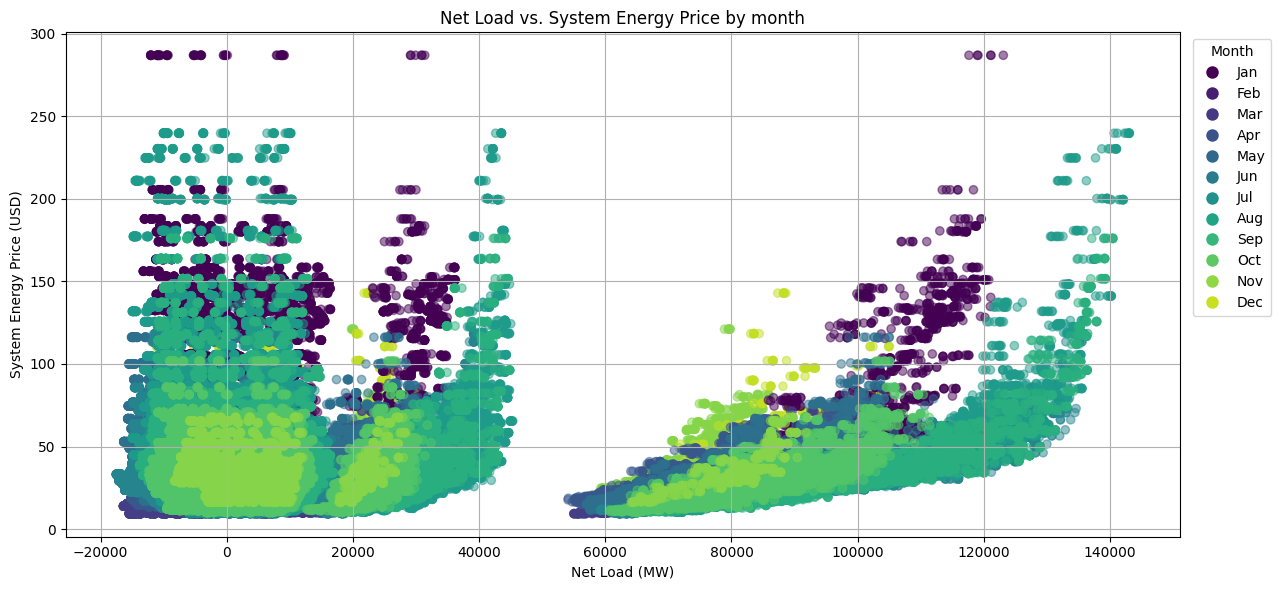

In [15]:
plot_load_vs_price(period='month') # demonstrates relation of month to system price
#plot_load_vs_price(period='hour') #cluttered graphs, not helpful to analysis
#plot_load_vs_price(period='day_of_week') #cluttered graphs, not helpful to analysis

#### Scatter plot with x as net load and y as system energy price and colormap as regional forescast_area
Demonstrates the relationship between net load and system energy price by region

In [16]:
def net_load_vs_price_by_area(df, area='Forecast Area'):
    categories = df['forecast_area'].astype('category').cat.codes
    cmap = plt.get_cmap('viridis')
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df[['net_load_mw']], df['system_energy_price_da'],alpha=0.3, c=categories, cmap=cmap)
    plt.title(f'Net Load vs. System Energy Price by {area}')
    plt.xlabel('Net Load (MW)')
    plt.ylabel('System Energy Price (USD)')
    plt.grid(True)
    plt.tight_layout()
    
    #legend
    unique_categories = np.unique(categories)
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i / len(unique_categories)), markersize=10) for i in unique_categories]
    labels = df['forecast_area'].astype('category').cat.categories
    plt.legend(handles, labels, title="Forecast Area",bbox_to_anchor=(1.005, 1), loc='upper left')
    
    plt.savefig(f'{plot_dir}net_load_vs_price_{area}.png')
    plt.show()    

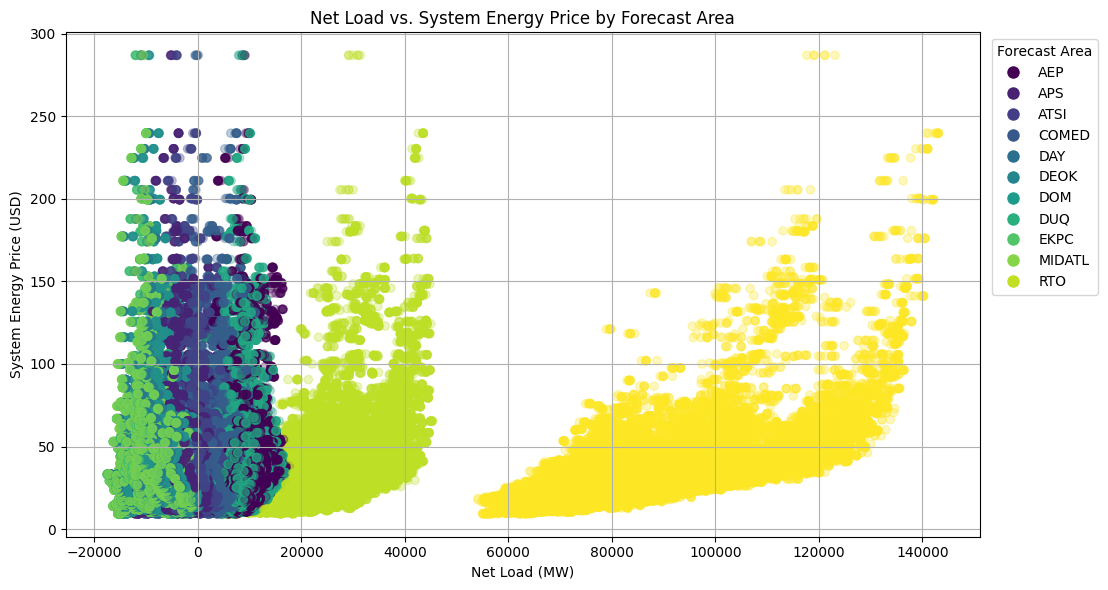

In [17]:
net_load_vs_price_by_area(merged_load_price)

#### histogram by number of values with x as net load and y as system energy price

In [18]:
def hist_load_price(df, bins=50):
    plt.figure(figsize=(12, 6))
    plt.hist(df['net_load_mw'], bins=bins, alpha=0.5, label='Net Load (MW)')
    plt.hist(df['system_energy_price_da'], bins=bins, alpha=0.5, label='System Energy Price (USD)')
    plt.title(f'Net Load vs. System Energy Price Frequency Distribution (bins={bins})')
    plt.xlabel('Net Load (MW)')
    plt.ylabel('Frequency')
    plt.legend(['Net Load (MW)'])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
#hist_load_price(merged_load_price) # demonstrates relation of month to system price

#### Line plot of average system energy price vs. net load 

In [19]:
def binned_avg_price_vs_load(df, bins=50):
    df['net_load_bin'] = pd.cut(df['net_load_mw'], bins=bins, labels=False)
    net_load_group = df.groupby('net_load_bin')['system_energy_price_da'].mean()

    plt.figure(figsize=(12, 6))
    plt.plot(net_load_group, marker='o')
    plt.title(f'Net Load vs. System Energy Price Average (bins={bins})')
    plt.xlabel('Net Load Bin (MW)')
    xlabels = np.linspace(df['net_load_mw'].min(), df['net_load_mw'].max(), bins)
    xlabels = ['' if i % 4 !=0 else f'{int(label/1000)} k' for i, label in enumerate(xlabels)]
    plt.xticks(ticks=range(bins), labels=xlabels, rotation=60)
    plt.ylabel('Average System Energy Price (USD)')
    plt.grid()
    plt.tight_layout()
    plt.show()
    

#binned_avg_price_vs_load(merged_load_price, bins=50)

#### Combined Load vs Avg Price line plot against load data frequency histogram

**Demonstrates**: skewedness of the data leading to a poor correlation between net load and system energy price due to underrepresentation of higher net load values, and overrepresentation of lower net load values

**Reason**: net load is pulled from 11 regional areas while price is only pulled from 1 node in a single region (node PJM-RTO in region RTO)

**Outcome (linear/exponential fit)**: worse correlation between net load and system energy price, as the net load data is not representative of the entire system energy price data and will skew the regression line towards the lower net load values

**Next step**: split data into 2 regions to better relate net load to system energy price based on use case.

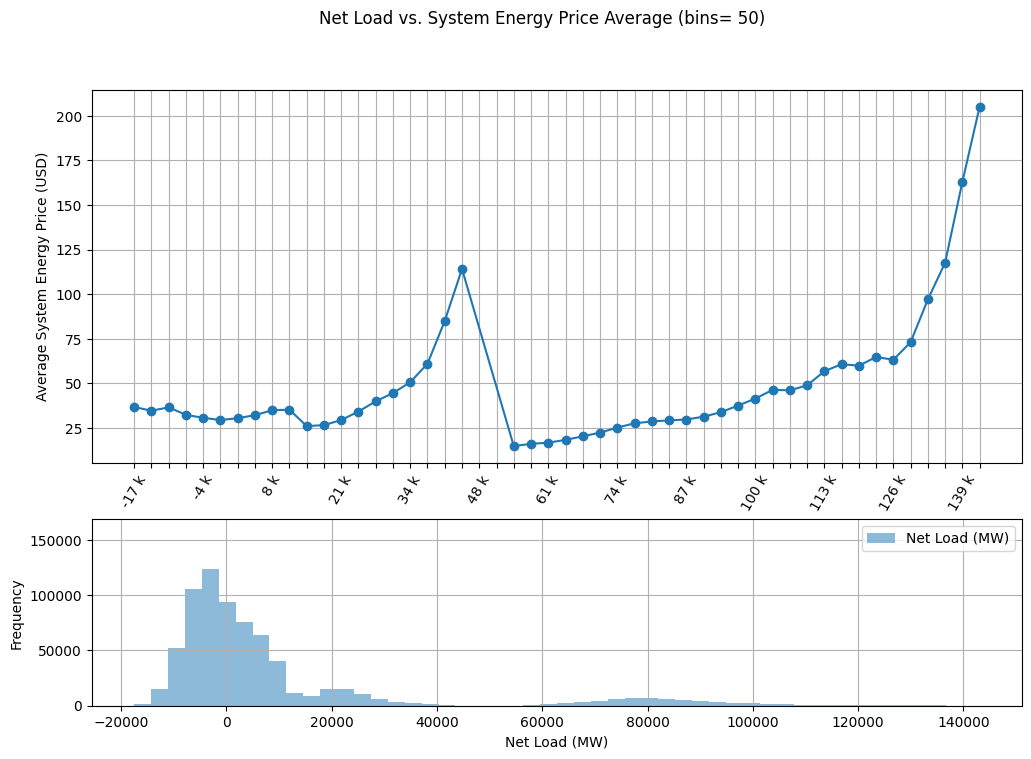

In [20]:
def combined_plot(df, bins=50, area=''):
    fig, (ax_binned_avg_price_vs_load, ax_hist_load_price) = plt.subplots(2, gridspec_kw={'height_ratios': [2, 1]}, figsize=(12, 8))
    df['net_load_bin'] = pd.cut(df['net_load_mw'], bins=bins, labels=False)
    net_load_group = df.groupby('net_load_bin')['system_energy_price_da'].mean()

    ax_binned_avg_price_vs_load.plot(net_load_group, marker='o')
    fig.suptitle(f'Net Load vs. System Energy Price Average (bins= {bins})')
    ax_binned_avg_price_vs_load.set_xlabel('Net Load Bin (MW)')
    xlabels = np.linspace(df['net_load_mw'].min(), df['net_load_mw'].max(), bins)
    xlabels = ['' if i % 4 !=0 else f'{int(label/1000)} k' for i, label in enumerate(xlabels)]
    ax_binned_avg_price_vs_load.set_xticks(ticks=range(bins), labels=xlabels, rotation=60)
    ax_binned_avg_price_vs_load.set_ylabel('Average System Energy Price (USD)')
    ax_binned_avg_price_vs_load.grid()
    
    ax_hist_load_price.hist(df['net_load_mw'], bins=bins, alpha=0.5, label='Net Load (MW)')
    ax_hist_load_price.hist(df['system_energy_price_da'], bins=bins, alpha=0.5, label='System Energy Price (USD)')
    ax_hist_load_price.set_xlabel('Net Load (MW)')
    ax_hist_load_price.set_ylabel('Frequency')
    ax_hist_load_price.legend(['Net Load (MW)'])
    ax_hist_load_price.grid()
    plt.savefig(f"{plot_dir}combined{f'_{area}' if area else ''}.png")
    plt.show()
    
combined_plot(merged_load_price, bins=50)

In [21]:
# testing PJM-RTO theory
print('historical energy price nodes: ',df_day_ahead_energy_price['pnode_name'].value_counts(), '\n')
print('historical power load areas: ',df_historical_power_load['forecast_area'].value_counts(), '\n')
print('total power load values: ',df_historical_power_load['forecast_area'].count())

mereg_load_price_copy = merged_load_price.copy()
ELSE_merged_load_price = mereg_load_price_copy[mereg_load_price_copy['forecast_area'] != 'RTO']
mereg_load_price_copy = merged_load_price.copy()
JPMRTO_merged_load_price = mereg_load_price_copy[mereg_load_price_copy['forecast_area'] == 'RTO']

historical energy price nodes:  PJM-RTO    8761
Name: pnode_name, dtype: int64 

historical power load areas:  AEP       64854
APS       64854
COMED     64854
DEOK      64854
DOM       64854
DAY       64854
DUQ       64854
EKPC      64854
ATSI      64854
MIDATL    64854
RTO       64854
Name: forecast_area, dtype: int64 

total power load values:  713394


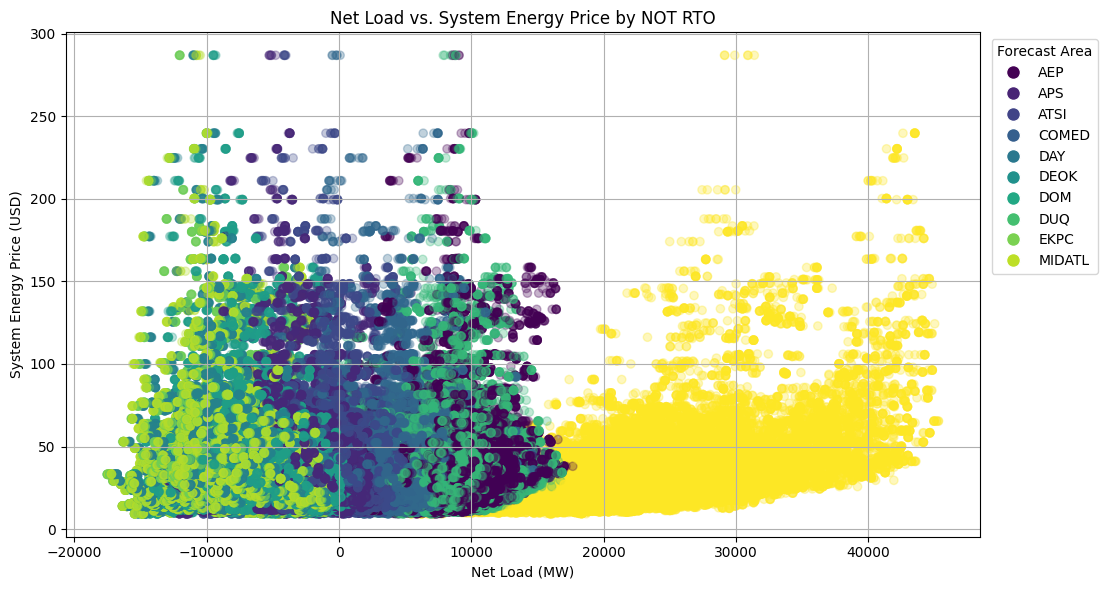

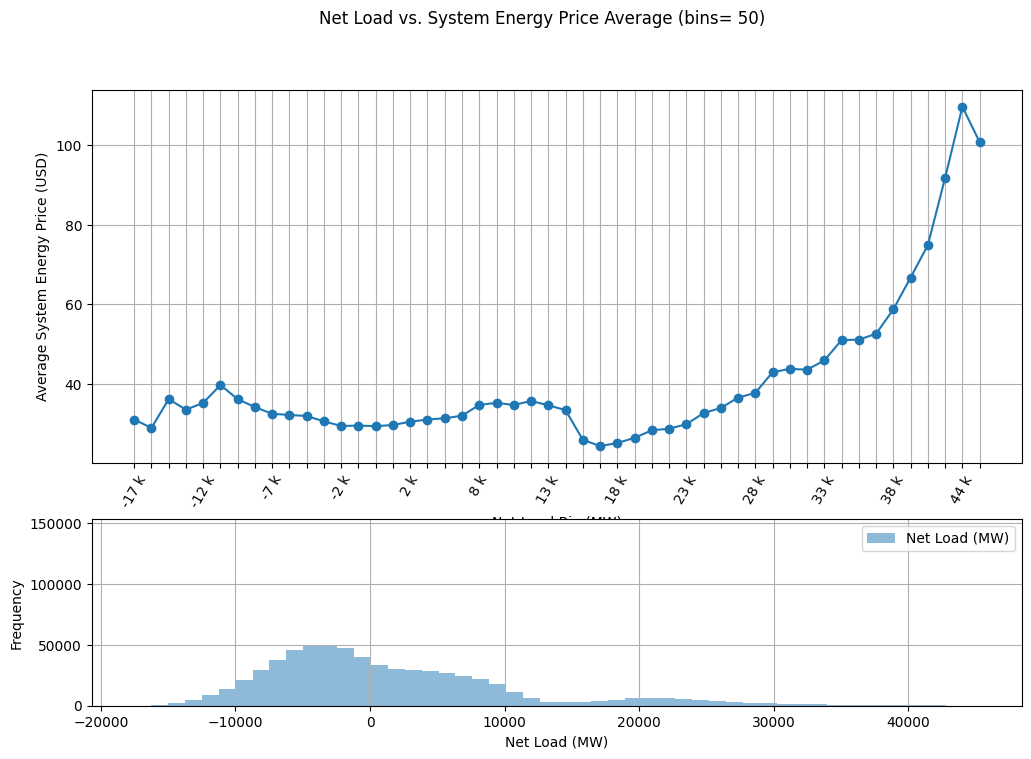

In [22]:
net_load_vs_price_by_area(ELSE_merged_load_price, area='NOT RTO')
combined_plot(ELSE_merged_load_price, bins=50, area='NOT_RTO')

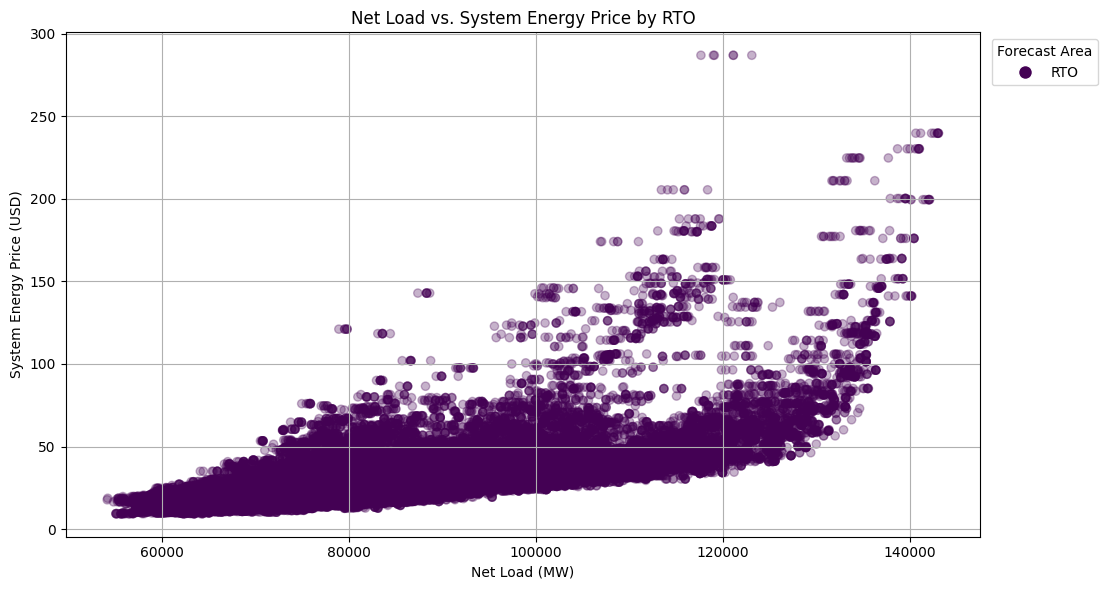

/var/folders/0f/cgwjfy6x7xl837z0mt90bnxr0000gn/T/ipykernel_42852/2725492218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['net_load_bin'] = pd.cut(df['net_load_mw'], bins=bins, labels=False)


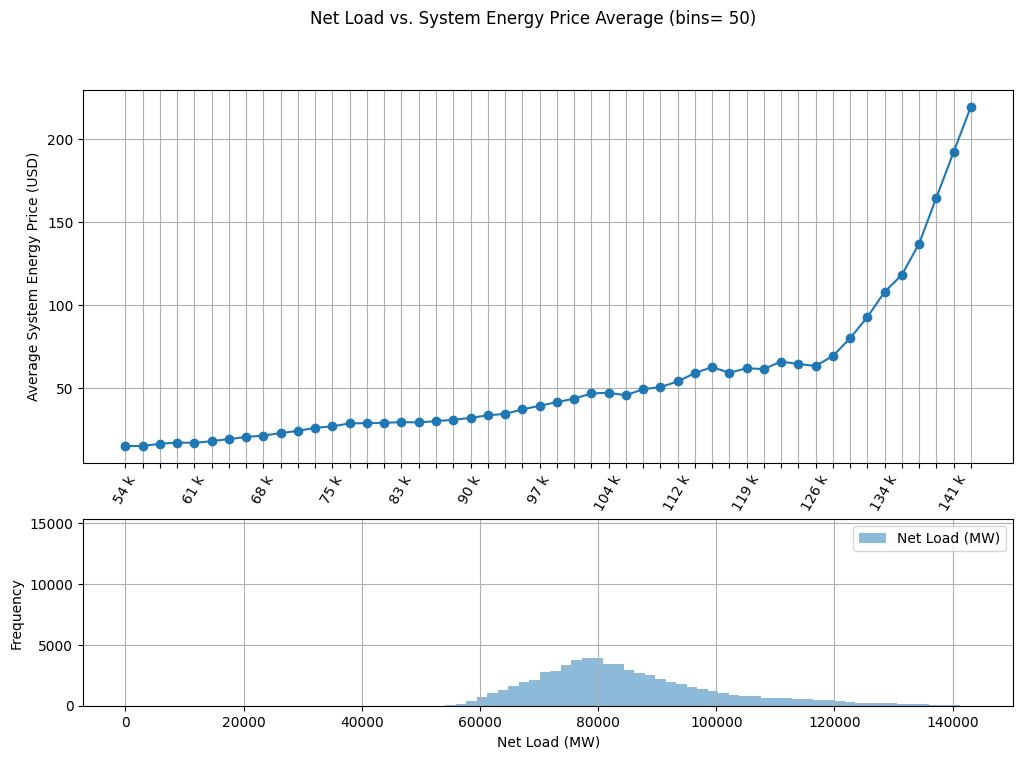

In [23]:
net_load_vs_price_by_area(JPMRTO_merged_load_price, area='RTO')
combined_plot(JPMRTO_merged_load_price, bins=50, area='RTO')

In [24]:
# binned_avg_price_vs_load(JPMRTO_merged_load_price, bins=50)

In [25]:
#hist_load_price(JPMRTO_merged_load_price, bins=50)

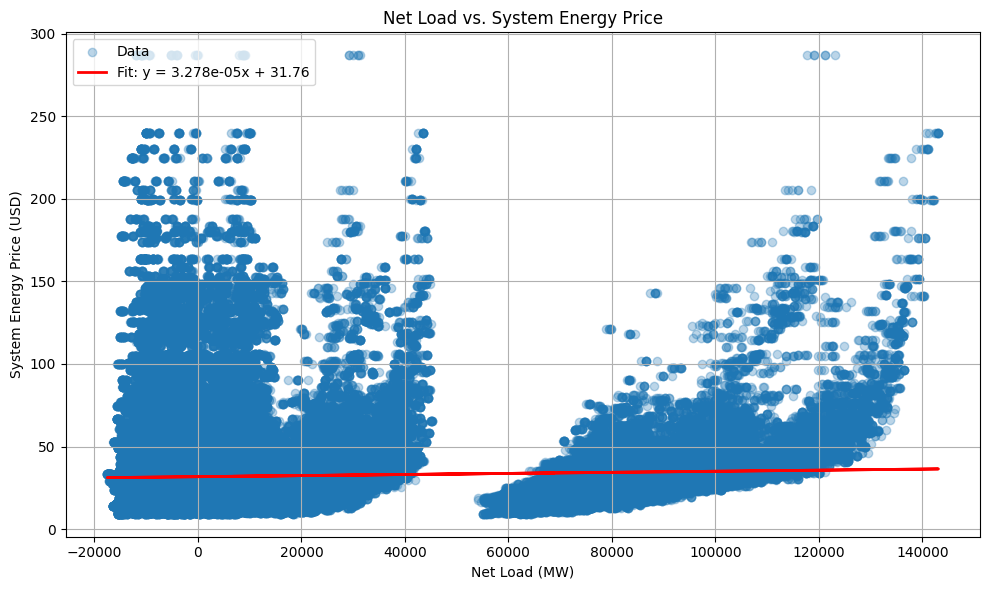

Linear fit equation: y = 3.278e-05 + 31.76


In [26]:
X = merged_load_price['net_load_mw']
y = merged_load_price['system_energy_price_da']

coeffs = np.polyfit(X, y, 1)
y_fit = np.polyval(coeffs, X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Data')
plt.plot(X, y_fit, color='red', linewidth=2,label=f'Fit: y = {coeffs[0]:.4g}x + {coeffs[1]:.4g}')
plt.title('Net Load vs. System Energy Price')
plt.xlabel('Net Load (MW)')
plt.ylabel('System Energy Price (USD)')
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print(f"Linear fit equation: y = {coeffs[0]:.4g} + {coeffs[1]:.4g}")

In [27]:
X = merged_load_price['net_load_mw']
y = merged_load_price['system_energy_price_da']

polynomial_degree = range(1, 7)
polynomial_y_fits = []
r2_scores = []
rmse_scores = []
score_relative_to_baseline = []

for degree in polynomial_degree:
    coeffs = np.polyfit(X, y, degree)
    y_fit = np.polyval(coeffs, X)
    polynomial_y_fits.append(y_fit)
    r2_scores.append(np.corrcoef(y, y_fit)[0, 1] ** 2)
    rmse = np.sqrt(np.mean((y - y_fit) ** 2))
    rmse_scores.append(rmse)
    score_relative_to_baseline.append(1 - rmse / rmse_scores[0])

# best degree by RMSE
best_degree = polynomial_degree[np.argmax(r2_scores)]
print(f'Best Polynomial Degree (lowest R^2): {best_degree}')


degree_scores = pd.DataFrame({'Degree': polynomial_degree, 
                              'R^2 Score': r2_scores, 
                              'RMSE': rmse_scores,
                              'Score': score_relative_to_baseline})
degree_scores

Best Polynomial Degree (lowest R^2): 6


,Degree,R^2 Score,RMSE,Score
0,1,0.001979,19.143309,0.000000
1,2,0.017272,18.996075,0.007691
2,3,0.032888,18.844536,0.015607
3,4,0.044364,18.732402,0.021465
4,5,0.048238,18.694387,0.023451
5,6,0.048858,18.688303,0.023768


**RMSE**: how far predicted energy prices are from the actual values on average in USD.

**R^2**: secondary check of how much variability in energy prices.

**Score**: relative to the baseline model (degree=1) in terms of RMSE.